Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

# Strojno učenje
<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

# Laboratorijska vježba 4: Neparametarski modeli i vrednovanje modela

(c) 2015 Jan Šnajder, Domagoj Alagić

*Verzija 0.3*

Objavljeno: **7. siječnja 2016.**<br>
Rok za predaju: **11-15. siječnja 2016.**

## Upute

Laboratorijska vježba 4 sastoji se od 8 zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg koda te evaluiranja ćelija. Odgovore na pitanja **nemojte pisati** u bilježnicu koju ćete demonstrirati asistentu (kako ih pri predaji ne biste samo čitali).

Osigurajte da u potpunosti **razumijete** kod koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta preinačiti i ponovno evaluirati Vaš kod. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Stoga se nemojte ograničiti samo na to da riješite zadatak, već slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import scipy as sp
import sklearn
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Pomoćna funkcija za iscrtavanje ulaznog prostora primjera i granice između klasa:

In [2]:
def plot_problem(X, y, h=None, surfaces=True) :
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision boundaries (surfaces=False) or decision surfaces (surfaces=True)
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h != None : 
        # Create a mesh to plot in
        r = 0.02  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX = np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if shape(Z_test) == () :
                # h returns a scalar when applied to a matrix; map explicitly
                Z = sp.array(map(h,XX))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = sp.array(map(h,XX))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        if surfaces :
            plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        else :
            plt.contour(xx, yy, Z)
    # Plot the dataset
    scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Paired,marker='o',s=50);

## Zadatci

### 1. Implementacija algoritma k-nn

### (a)

Implementirajte klasu `KNN` koja implementira algoritam $k$ najbližih susjeda. Neobavezan parametar konstruktora jest broj susjeda ($k$), čija je podrazumijevana vrijednost 3. Definirajte metode `fit(X, y)` i `predict(X)`, koje služe za treniranje modela odnosno predikciju. Kao mjeru udaljenosti koristite euklidsku udaljenost ([`scipy.linalg.norm`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.norm.html)). Nije potrebno implementirati težinsku funkciju.

In [3]:
from scipy.linalg import norm

class KNN():
    def __init__(self, k = 3):
        self.k = k
    def fit(self, X, y):
        self.X = X
        self.y = y
    def predict(self, X):
        hs = []
        for x_new in X:
            distances = sorted([(norm(self.X[i] - x_new), i) for i in range(len(self.X))])
            nearest_k_ind = [x[1] for x in distances[:self.k]]
            h = round(float(1) / self.k * sum([self.y[i] for i in nearest_k_ind]),0)
            hs.append(int(h))
        return hs

### (b)

Isprobajte algoritam implementiran u (a) dijelu zadatka na umjetno generiranome skupu s $n=2$ značajke, $K=2$ klase i $N=100$ primjera. Provjerite ispravnost algoritma tako da predikcije usporedite s onima algoritma [`sklearn.neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

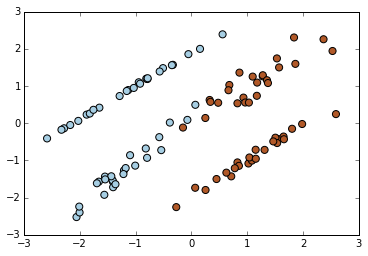

Podudaranje ručne i ugrađene metode (primjeri za učenje): 100.0 %


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2, random_state = 42)
plot_problem(X, y)
plt.show()

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 


        
knn = KNN()

knn.fit(X, y)

knn_l =  knn.predict(X)
neigh_l = neigh.predict(X)

def identity(b):
    if b == True:
        return 1
    else:
        return 0
same_perc = float(sum([identity(knn_l[i] == neigh_l[i]) for i in range(len(knn_l))])) / len(knn_l)
print 'Podudaranje ručne i ugrađene metode (primjeri za učenje):', same_perc*100,'%'


### (c) 

Pomoću funkcije `plot_problem` iscrtajte prostor primjera i područja koja odgovaraju prvoj odnosno drugoj klasi. Eksperimentirajte s različitim vrijednostima za broj primjera $N$, broj susjeda $k$ i broj klasa $K$.

**NB:** Implementacija algoritma `KNeighborsClassifier` iz sklearna vjerojatno će raditi brže od vaše implementacije, pa koristite nju za iscrtavanje grafa. Naime, za iscrtavanje grafa potrebno je napraviti predikciju za svaku točku u regiji iscrtavanja.

K: 2, N: 100, k: 1


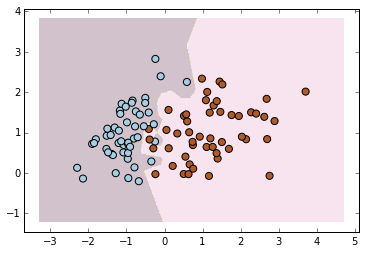

K: 2, N: 100, k: 3


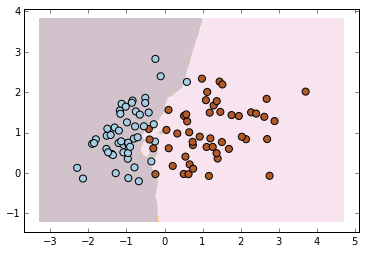

K: 2, N: 100, k: 5


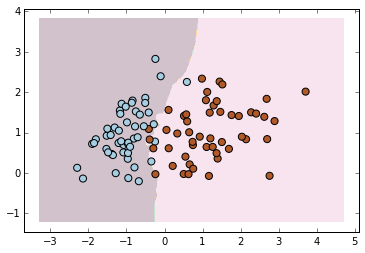

K: 2, N: 100, k: 15


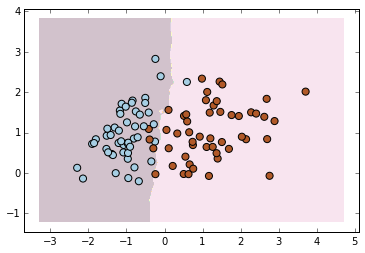

K: 2, N: 100, k: 30


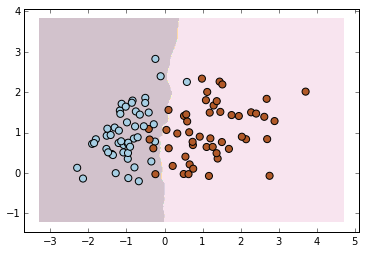

K: 2, N: 100, k: 50


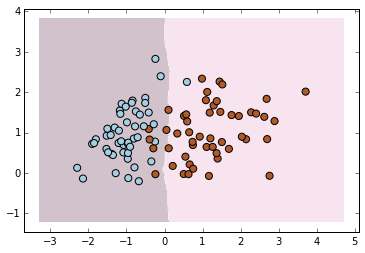

K: 2, N: 500, k: 1


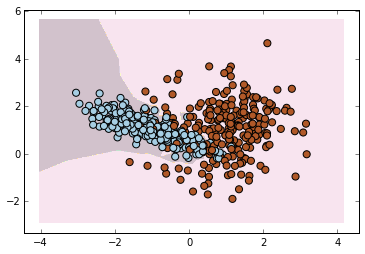

K: 2, N: 500, k: 3


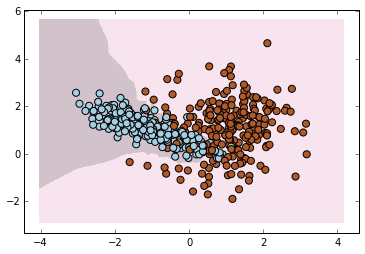

K: 2, N: 500, k: 5


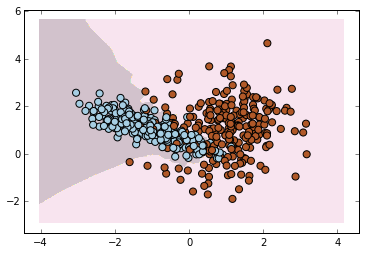

K: 2, N: 500, k: 15


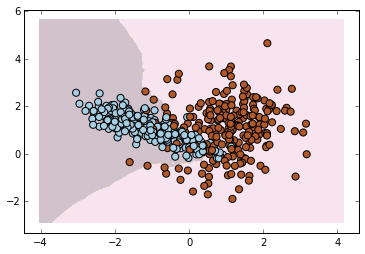

K: 2, N: 500, k: 30


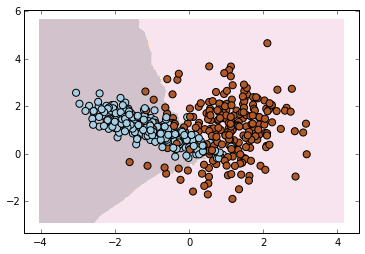

K: 2, N: 500, k: 50


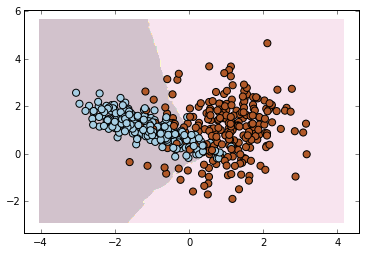

K: 2, N: 1000, k: 1


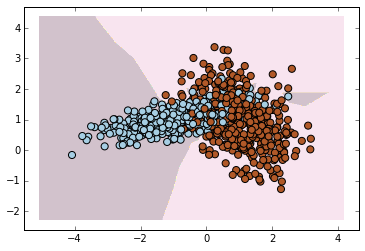

K: 2, N: 1000, k: 3


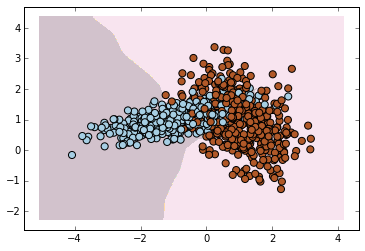

K: 2, N: 1000, k: 5


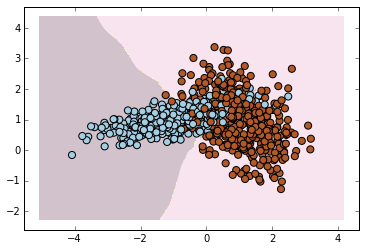

K: 2, N: 1000, k: 15


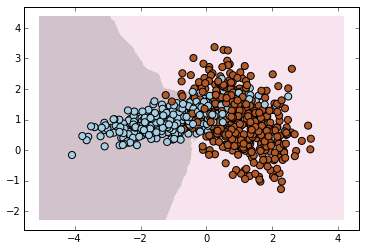

K: 2, N: 1000, k: 30


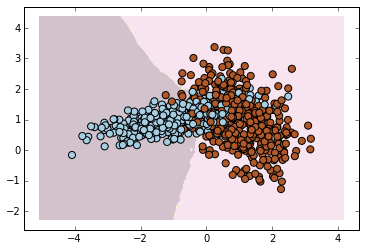

K: 2, N: 1000, k: 50


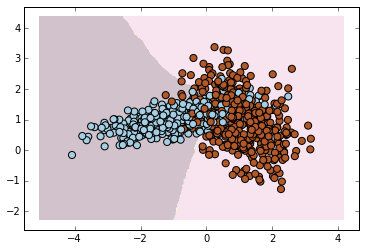

K: 3, N: 100, k: 1


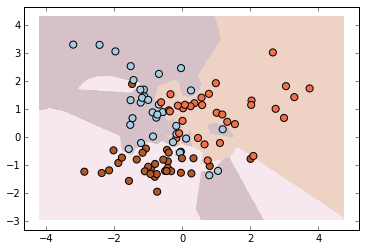

K: 3, N: 100, k: 3


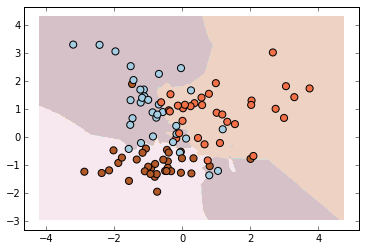

K: 3, N: 100, k: 5


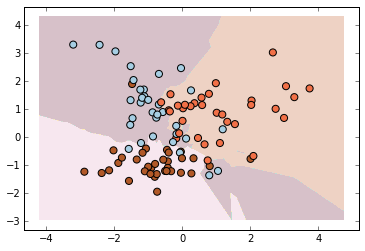

K: 3, N: 100, k: 15


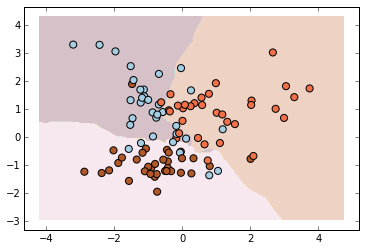

K: 3, N: 100, k: 30


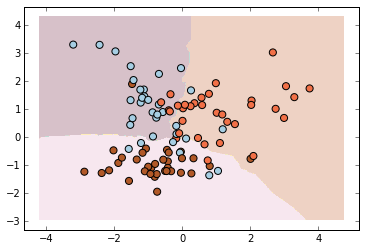

K: 3, N: 100, k: 50


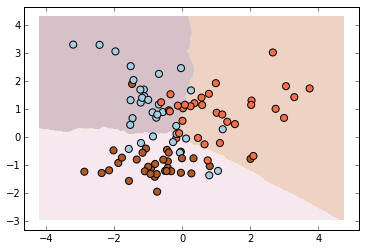

K: 3, N: 500, k: 1


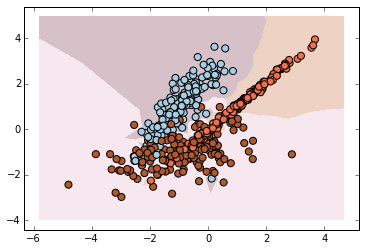

K: 3, N: 500, k: 3


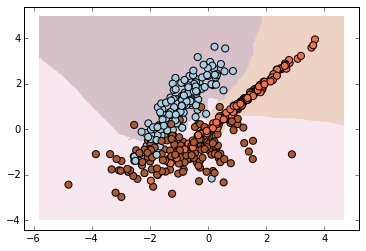

K: 3, N: 500, k: 5


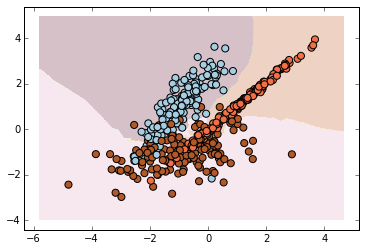

K: 3, N: 500, k: 15


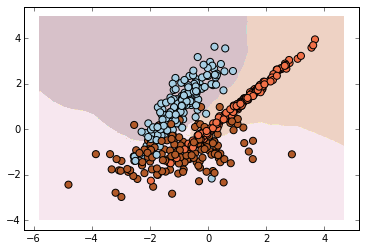

K: 3, N: 500, k: 30


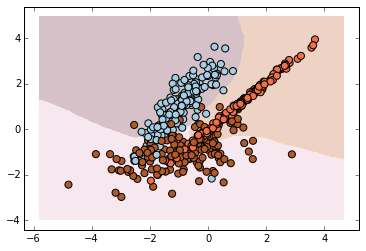

K: 3, N: 500, k: 50


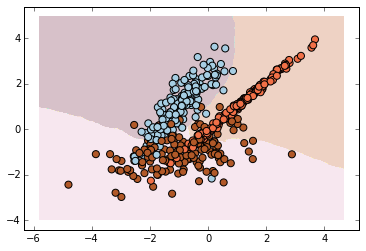

K: 3, N: 1000, k: 1


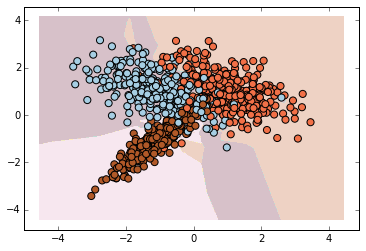

K: 3, N: 1000, k: 3


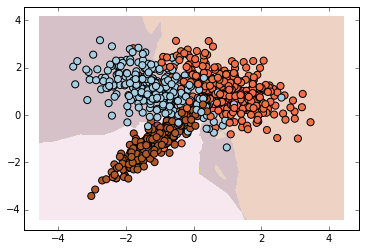

K: 3, N: 1000, k: 5


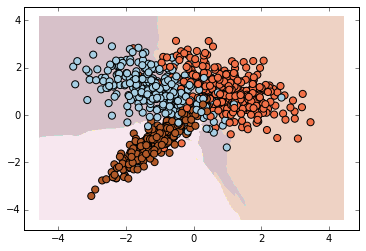

K: 3, N: 1000, k: 15


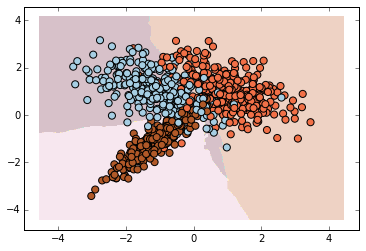

K: 3, N: 1000, k: 30


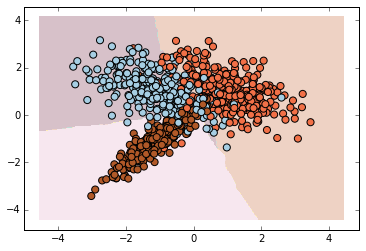

K: 3, N: 1000, k: 50


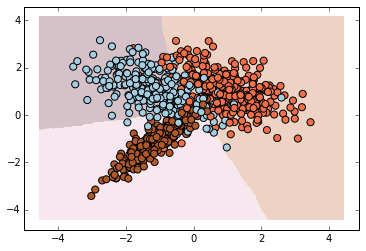

K: 4, N: 100, k: 1


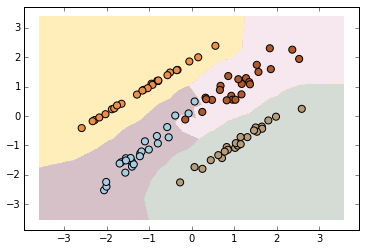

K: 4, N: 100, k: 3


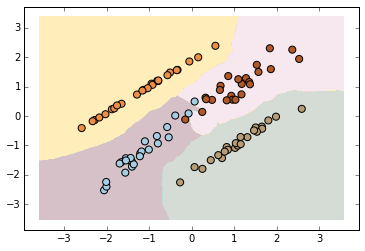

K: 4, N: 100, k: 5


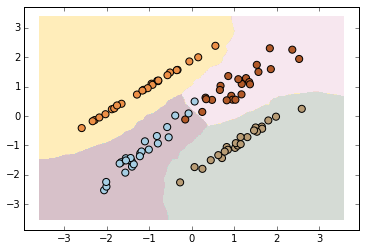

K: 4, N: 100, k: 15


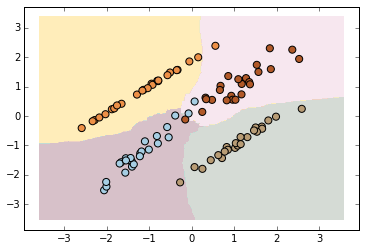

K: 4, N: 100, k: 30


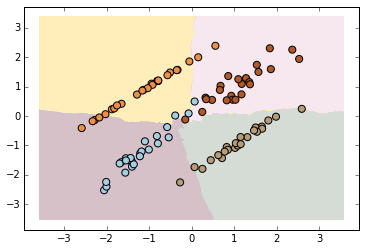

K: 4, N: 100, k: 50


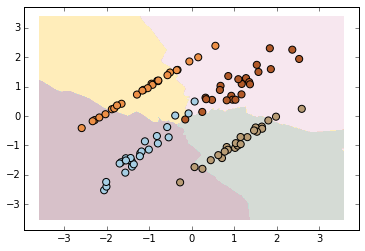

K: 4, N: 500, k: 1


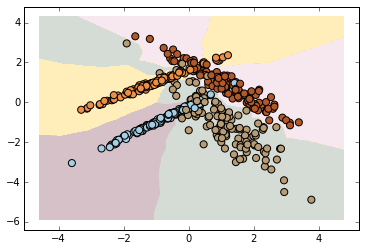

K: 4, N: 500, k: 3


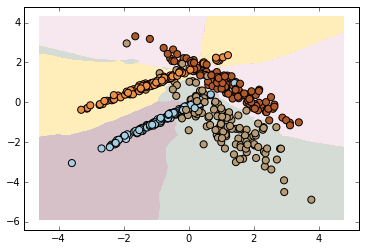

K: 4, N: 500, k: 5


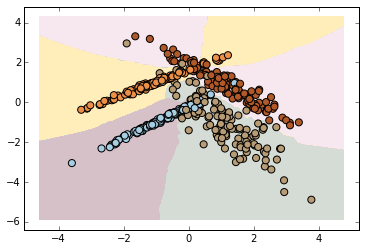

K: 4, N: 500, k: 15


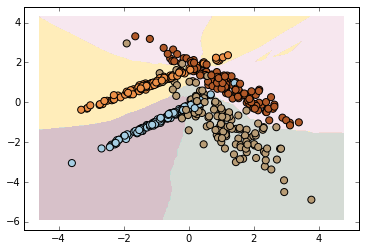

K: 4, N: 500, k: 30


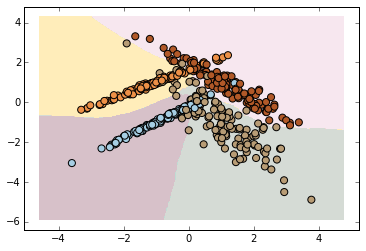

K: 4, N: 500, k: 50


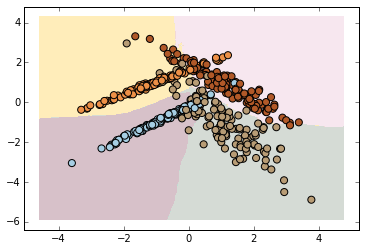

K: 4, N: 1000, k: 1


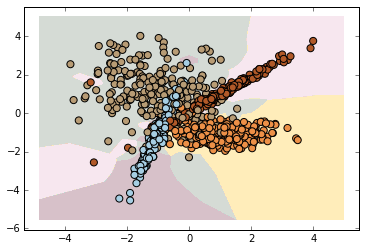

K: 4, N: 1000, k: 3


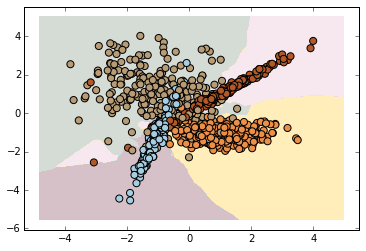

K: 4, N: 1000, k: 5


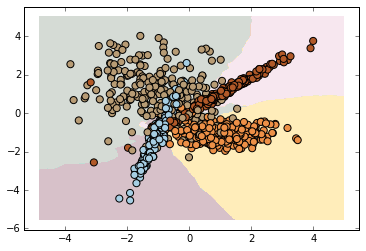

K: 4, N: 1000, k: 15


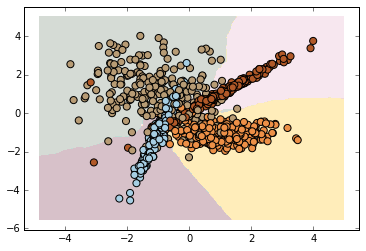

K: 4, N: 1000, k: 30


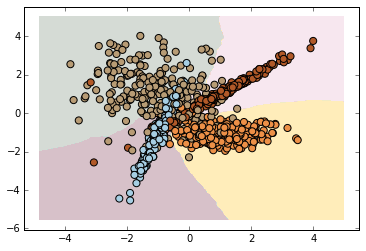

K: 4, N: 1000, k: 50


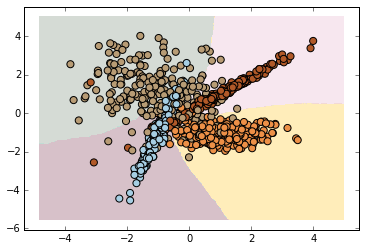

In [5]:
Ns = [100, 500, 1000]
Ks = [2,3,4]
ks = [1, 3, 5, 15, 30, 50]

for K in Ks:
    for N in Ns:
        for k in ks:
            X1, y1 = make_classification(n_samples=N, n_features=2, n_classes=K, n_redundant=0, n_clusters_per_class=1, random_state = 42)
            print 'K: %d, N: %d, k: %d' % (K, N, k)
            neigh = KNeighborsClassifier(n_neighbors=k)
            neigh.fit(X1, y1)
            plot_problem(X1, y1, h = neigh.predict)
            plt.show()

**Q:** Kako hiperparametar $k$ utječe na izgled granice između klasa?
    
**Q:** U kojem slučaju (za koju vrijednost $k$) pogreška učenja može doseći nulu? Zašto?
    
**Q:** Kako biste odredili optimalnu vrijednost za $k$?

### 2. Empirijska analiza algoritma k-nn

Algoritam k-nn ima hiperparametar $k$ (broj susjeda). Taj parametar izravno utječe na složenost algoritma, pa je važno dobro odabrati njegovu vrijednost. Kao i kod mnogih drugih algoritama, tako i kod algoritma k-nn optimalna vrijednost hiperametra $k$ ovisi o konkretnom problemu, uključivo broju primjera $N$, broju značajki (dimenzija) $n$ te broju klasa $K$. Svrha ovog zadatka jest provesti sustavnu empirijsku analizu ovih ovisnosti.

### (a)

Sintetički skup primjera od $N=200$ primjera s $n=2$ značajke i $K=2$ klase podijelite na skup za učenje i skup za ispitivanje u omjeru 7:3 (koristite funkciju [`sklearn.cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). Iscrtajte krivulje pogreške učenja i pogreške ispitivanja za $k\in\{1,\dots,20\}$.

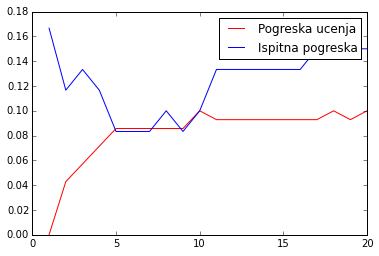

In [102]:
from sklearn.cross_validation import train_test_split

X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train = [];
test  = [];

def error(y_true , y_predict):
    ys = y_true - y_predict
    return 1 - float(len([x for x in ys if x == 0]))/len(y_true)

ks = range(1,21)
for k in ks:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    
    train.append(error(y_train , neigh.predict(X_train)))
    test.append(error(y_test , neigh.predict(X_test)))
    
plt.plot(ks, train,color='red', label='Pogreska ucenja')
plt.plot(ks, test,color='blue', label='Ispitna pogreska')
plt.legend()
plt.show()



**Q:** Kojem području odgovara prenaučenost, a kojem podnaučenost modela? Zašto?

**Q:** Jesu li ovi rezultati stabilni? Zašto?

### (b) 

Kako bismo dobili pouzdanije rezultate, potrebno je mjerenja ponoviti na različitim skupovima podataka i zatim uprosječiti dobivene vrijednosti pogreška. Definirajte funkciju

> `knn_eval(n_instances, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100)`

koja trenira i ispituje model k-nn na ukupno `n_instances` primjera, i to tako da za svaku vrijednost hiperparametra iz zadanog intervala `k_range` ponovi `n_trials` mjerenja, generirajući svaki puta nov skup podataka pomoću funkcije `make_classification`. Vrijednosti parametara `n_instances`, `n_features`, `n_classes` i `n_informative` proslijedite funkciji `make_classification` te dodatno postavite `n_redundant=0` i `n_clusters_per_class=1`. Svaki generirani skup primjera treba pomoću funkcije `train_test_split` podijeliti na skup za učenje i skup za ispitivanje, pri čemu je udio skupa za ispitivanje definiran  parametrom `test_size`. Tu podjelu nije potrebno dodatno ponavljati; dovoljno je što se u svakoj iteraciji generira posve nov skup primjera. Povratne vrijednosti funkcije jest trojka `(best_k, train_errors, test_errors)`. Vrijednost `best_k` je optimalna vrijednost hiperparametra $k$ (vrijednost za koju je pogreška na skupu za ispitivanje najmanja). Vrijednosti `train_errors` i `test_errors`  liste su pogrešaka na skupu za učenja odnosno skupu za testiranje za sve razmatrane vrijednosti hiperparametra $k$.

In [103]:
def knn_eval(n_instances, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=range(1, 20), n_trials=100):
    best_k = 0
    train_errors = [0.0] * len(k_range)
    test_errors = [0.0] * len(k_range)
    smallest_error = 1.0
    current = 0
    for k in k_range:
        for _ in range(n_trials):
            X_e, y_e = make_classification(n_samples=n_instances, n_features=n_features, n_informative = n_informative, n_classes=n_classes, n_redundant=0, n_clusters_per_class=1)
            X_e_train, X_e_test, y_e_train, y_e_test = train_test_split(X_e, y_e, test_size=test_size)
            neigh = KNeighborsClassifier(n_neighbors=k)
            neigh.fit(X_e_train, y_e_train)
            train_error = error(y_e_train , neigh.predict(X_e_train))
            test_error = error(y_e_test , neigh.predict(X_e_test))
            
            train_errors[current] += train_error
            test_errors[current] += test_error
        current += 1
    train_errors = [x/float(n_trials) for x in train_errors]
    test_errors = [x/float(n_trials) for x in test_errors]
    
    k = 1
    for err in test_errors:
        if err < smallest_error:
            smallest_error = err
            best_k = k
        k += 1
        
    return best_k, train_errors, test_errors
    

### (c)

Pomoću funkcije `knn_eval` iz (b) dijela zadatka, iscrtajte pogrešku učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=200$ primjera. Ispišite i optimalnu vrijednost za $k$.

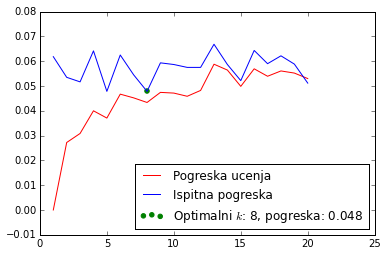

In [8]:
ks = range(1,21)
N = 200
best_k, train_errors, test_errors = knn_eval(N, k_range = ks)

plt.plot(ks, train_errors,color='red', label='Pogreska ucenja')
plt.plot(ks, test_errors,color='blue', label='Ispitna pogreska')
plt.scatter([best_k], [test_errors[best_k-1]], color = 'g', label = 'Optimalni $k$: %d, pogreska: %.3f' % (best_k, test_errors[best_k-1]))
plt.legend(loc = 'lower right')
plt.show()



**Q:** Jesu li rezultati očekivani? Obrazložite.

### (d)

Pomoću funkcije `knn_eval` iz (b) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=\{50, 100, 200, 500, 1000, 5000\}$ primjera. Načinite 6 zasebnih grafikona (generirajte ih u for-petlji). U svakoj iteraciji ispišite optimalnu vrijednost za $k$.

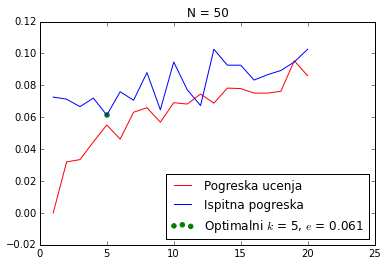

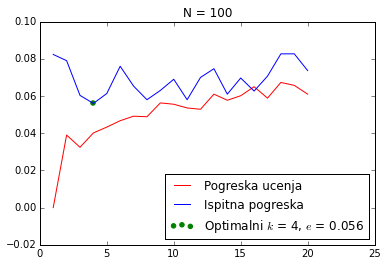

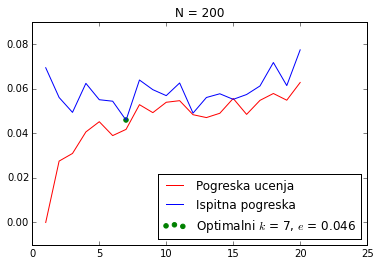

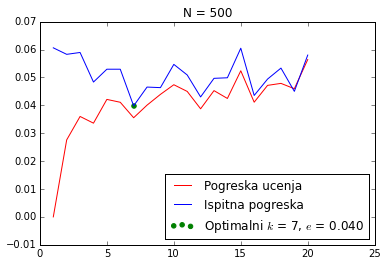

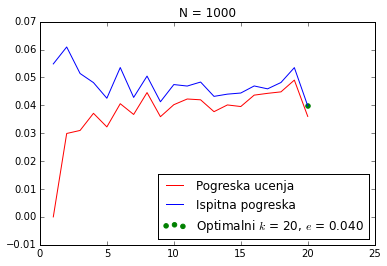

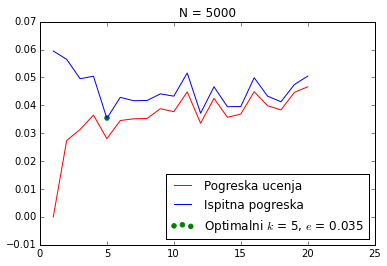

In [9]:
Ns = [50, 100, 200, 500, 1000, 5000]
ks = range(1,21)   

for N in Ns:
    best_k, train_errors, test_errors = knn_eval(N, k_range = ks)

    plt.plot(ks, train_errors,color='red', label='Pogreska ucenja')
    plt.plot(ks, test_errors,color='blue', label='Ispitna pogreska')
    plt.scatter([best_k], [test_errors[best_k-1]], color = 'g', label = 'Optimalni $k$ = %d, $e$ = %.3f' % (best_k, test_errors[best_k-1]))
    plt.title('N = %d' % N)
    plt.legend(loc = 'lower right')
    plt.show()
    

**Q:** Jesu li rezultati očekivani? Obrazložite.

### (e)

Pomoću funkcije `knn_eval` iz (b) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za broj dimenzija $n=\{2,3,\dots,10\}$, i to za $N=200$ primjera. Načinite 8 zasebnih grafikona (generirajte ih u for-petlji). U svakoj iteraciji ispišite optimalnu vrijednost za $k$.

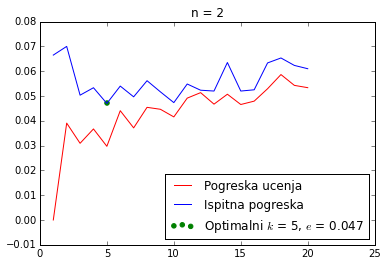

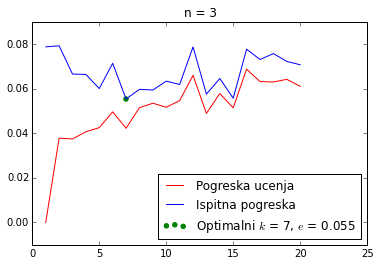

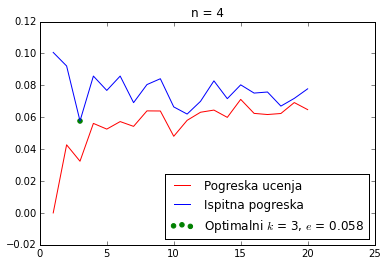

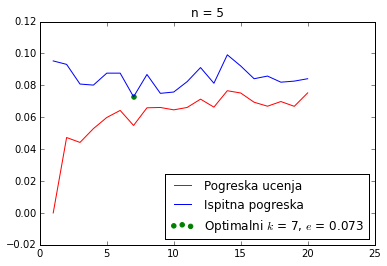

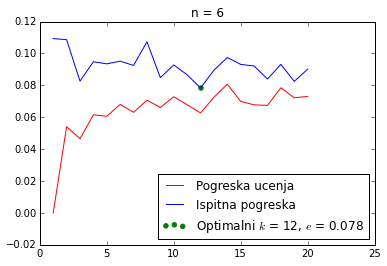

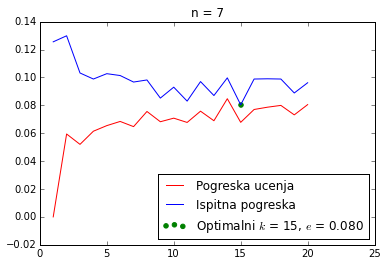

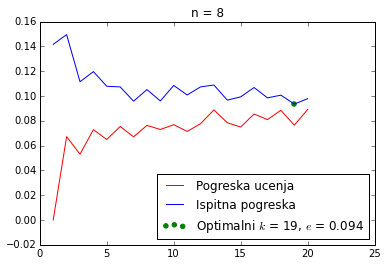

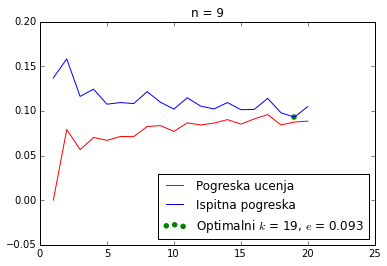

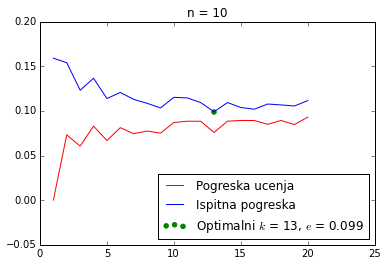

In [10]:
ns = range(2, 11)
N = 200
ks = range(1, 21)
for n in ns:
    n_informative = 2
    best_k, train_errors, test_errors = knn_eval(N, n_features=n, n_informative=n_informative, k_range=ks)
    plt.plot(ks, train_errors,color='red', label='Pogreska ucenja')
    plt.plot(ks, test_errors,color='blue', label='Ispitna pogreska')
    plt.scatter([best_k], [test_errors[best_k-1]], color = 'g', label = 'Optimalni $k$ = %d, $e$ = %.3f' % (best_k, test_errors[best_k-1]))
    plt.title('n = %d' % n)
    plt.legend(loc = 'lower right')
    plt.show()

**Q:** Jesu li rezultati očekivani? Obrazložite.

### (f)

Pomoću funkcije `knn_eval` iz (b) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za broj klasa $K=\{2,3,4,5\}$, i to za $N=200$ primjera. Načinite 4 zasebnih grafikona (generirajte ih u for-petlji). U svakoj iteraciji ispišite optimalnu vrijednost za $k$.

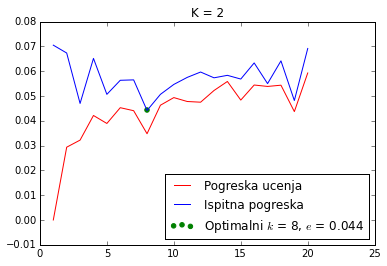

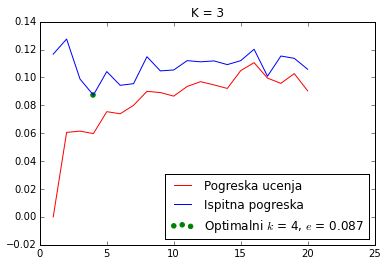

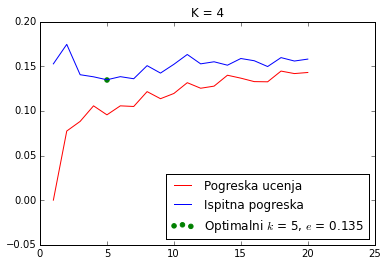

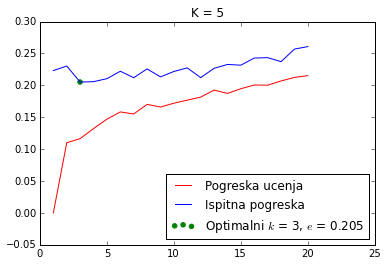

In [11]:
Ks = [2,3,4,5]
ks = range(1, 21)
N = 200
for K in Ks:
    if K == 5:
        best_k, train_errors, test_errors = knn_eval(N, n_features=3, n_classes=K, n_informative=3, test_size=0.3, k_range=ks, n_trials=100)
    else:
        best_k, train_errors, test_errors = knn_eval(N, n_classes=K, test_size=0.3, k_range=ks, n_trials=100)
    plt.plot(ks, train_errors,color='red', label='Pogreska ucenja')
    plt.plot(ks, test_errors,color='blue', label='Ispitna pogreska')
    plt.scatter([best_k], [test_errors[best_k-1]], color = 'g', label = 'Optimalni $k$ = %d, $e$ = %.3f' % (best_k, test_errors[best_k-1]))
    plt.title('K = %d' % K)
    plt.legend(loc = 'lower right')
    plt.show()
    

**Q:** Jesu li rezultati očekivani? Obrazložite.

### (g)

U prethodnim zadatcima analizirali smo oblik krivulja pogreška u ovisnosti o $k$, za nekoliko odabranih vrijednosti parametara $N$, $n$ odnosno $K$. Tako dobiveni uvidi su korisni, međutim, u praksi ćemo vrijednost za $k$ optimirati na skupu za provjeru, pa nas zapravo zanima kako se pogreške ponašaju uz optimalnu vrijednost za $k$. 

Koristeću funkciju `knn_eval` iz (b) dijela zadatka, generirajte grafikone koji prikazuju pogreške učenja i ispitivanja za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja), i to (1) u ovisnosti o broju primjera ($N\in\{100, 200,\dots, 1000\}$), (2) broju značajki ($n\in\{2,\dots,10\})$ i (3) broju klasa ($K\in\{2,\dots,10\})$. Posljednja dva grafikona generirajte s $N=1000$ primjera. Ukupno trebate generirati tri grafikona, svaki s dvije krivulje (pogreška učenja i pogreška ispitivanja).

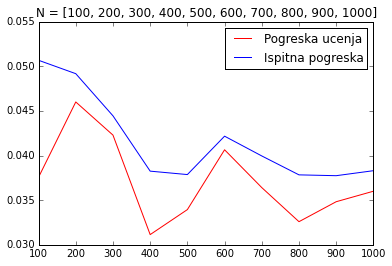

In [12]:
ks = range(1,21)
N_err_train = []
N_err_test = []
Ns = range(100,1100,100)
for N in Ns:
    best_k, train_errors, test_errors = knn_eval(N, test_size=0.3, k_range=ks, n_trials=100)
    N_err_train.append(train_errors[best_k-1])
    N_err_test.append(test_errors[best_k-1])
plt.plot(Ns, N_err_train,color='red', label='Pogreska ucenja')
plt.plot(Ns, N_err_test,color='blue', label='Ispitna pogreska')
plt.title('N = %s' % str(Ns))
plt.legend(loc = 'upper right')
plt.show()

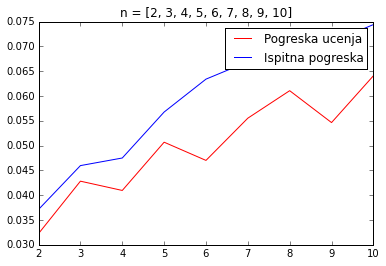

In [13]:
N = 1000
n_err_train = []
n_err_test = []
ns = range(2,11)
for n in ns:
    best_k, train_errors, test_errors = knn_eval(N, n_features=n, test_size=0.3, k_range=ks, n_trials=100)
    n_err_train.append(train_errors[best_k-1])
    n_err_test.append(test_errors[best_k-1])
plt.plot(ns, n_err_train,color='red', label='Pogreska ucenja')
plt.plot(ns, n_err_test,color='blue', label='Ispitna pogreska')
plt.title('n = %s' % str(ns))
plt.legend(loc = 'upper right')
plt.show()

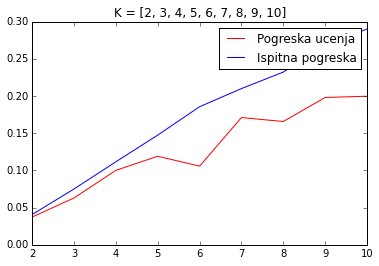

In [14]:
N = 1000
K_err_train = []
K_err_test = []
Ks = range(2,11)
for K in Ks:
    if (K >= 5 and K < 9):
        best_k, train_errors, test_errors = knn_eval(N, n_features=3, n_classes=K, n_informative=3, test_size=0.3, k_range=ks, n_trials=100)
    elif (K >= 9):
        best_k, train_errors, test_errors = knn_eval(N, n_features=4, n_classes=K, n_informative=4, test_size=0.3, k_range=ks, n_trials=100)
    else:
        best_k, train_errors, test_errors = knn_eval(N, n_classes = K, test_size=0.3, k_range=ks, n_trials=100)
    K_err_train.append(train_errors[best_k-1])
    K_err_test.append(test_errors[best_k-1])
plt.plot(Ks, K_err_train,color='red', label='Pogreska ucenja')
plt.plot(Ks, K_err_test,color='blue', label='Ispitna pogreska')
plt.title('K = %s' % str(Ks))
plt.legend(loc = 'upper right')
plt.show()

**Q:** Jesu li rezultati očekivani? Obrazložite.

### 3. Nerobusnost algoritma k-nn

Svrha ovog zadatka jest analizirati u kojoj je mjeri algoritam k-nn osjetljiv na razlike u mjernoj skali između pojedinih dimenzija te na prisutnost nebitnih značajki.

### (a)

Pomoću funkcije `make_classification` generirajte skup od $N=200$ primjera sa $n=2$ značajke i $K=2$ klase. Postavite `n_reduntant=0` i `n_clusters_per_class=2`. Zatim napravite kopiju tog skupa podataka i preinačite ju tako da jednu dimenziju pomnožite sa 100. Oba skupa podijelite na skup za učenje i skup za ispitivanje u omjeru 7:3, pri čemu obratite pozornost da oba skupa podijelite na identičan način, tako da se skupovi za učenje i ispitivanje oni u konačnici razlikuju jedino u tome što jedan ima jednu dimenziju skaliranu. Trenirajte modele k-nn na skaliranoj i neskaliranoj varijanti skupa za učenje, a zatim ispitajte model na odgovarajućim ispitnim varijantama skupova.

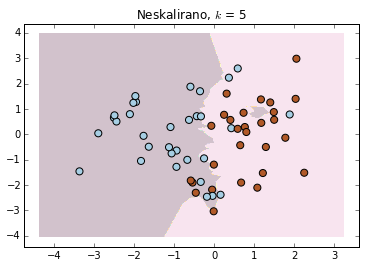

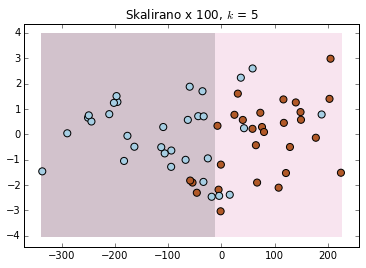

In [15]:
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2, random_state = 42)
X_scaled = np.array([[x[0]*100, x[1]] for x in X])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state = 42)
k = 5
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, y_train)
plot_problem(X_test, y_test, h = neigh.predict)
plt.title('Neskalirano, $k$ = %d' % k)
plt.show()

neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train_scaled, y_train)
plot_problem(X_test_scaled, y_test, h = neigh.predict)
plt.title('Skalirano x 100, $k$ = %d' % k)
plt.show()

#TO DO VARIJANTE


**Q:** Jesu li rezultati očekivani? Obrazložite.

### (b)

Kako bismo provjerili u kojoj je mjeri algoritam k-nn osjetljiv na prisustvo nebitnih značajki, možemo iskoristiti funkciju `make_classification` kako bismo generirali skup primjera kojemu su neke od značajki nebitne. Naime, parametar `n_informative` određuje broj bitnih značajki, dok parametar `n_features` određuje ukupan broj značajki. Ako je `n_features > n_informative`, onda će neke od značajki biti nebitne. Umjesto da izravno upotrijebimo funkciju `make_classification`, upotrijebit ćemo funkciju `knn_eval` iz zadatka (2b), jer ćemo na taj način dobiti pouzdanije procjene.

Generirajte dva skupa primjera, oba sa $N=1000$ primjera, $n=10$ značajki i $K=5$ klasa, ali za prvi neka su svih 10 značajki bitne, a za drugi neka je bitno samo 5 od 10 značajki. Ispišite pogreške učenja i ispitivanja za oba modela za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja).

10/10 bitne: k = 9, pogreška učenja: 0.092, ispitna pogreška: 0.127


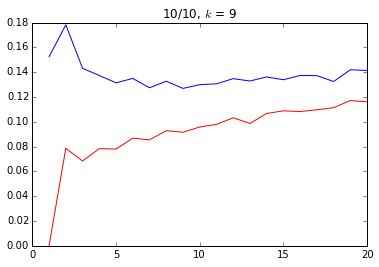

5/10 bitne: k = 18, pogreška učenja: 0.168, ispitna pogreška: 0.199


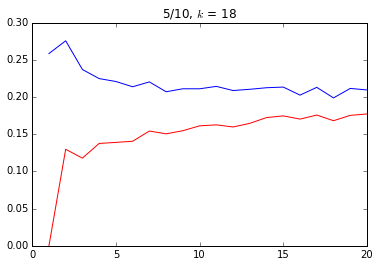

In [16]:
N = 1000
n = 10
K = 5

best_k, train_errors, test_errors = knn_eval(N, n_features=n, n_classes=K, n_informative=n, test_size=0.3, k_range=ks)
print '10/10 bitne: k = %d, pogreška učenja: %.3f, ispitna pogreška: %.3f' % (best_k, train_errors[best_k - 1], test_errors[best_k - 1])

plt.plot(ks, train_errors,color='red', label='Pogreska ucenja')
plt.plot(ks, test_errors,color='blue', label='Ispitna pogreska')
plt.title('10/10, $k$ = %d' % best_k)
plt.show()

best_k, train_errors, test_errors = knn_eval(N, n_features=n, n_classes=K, n_informative=n/2, test_size=0.3, k_range=ks)
print '5/10 bitne: k = %d, pogreška učenja: %.3f, ispitna pogreška: %.3f' % (best_k, train_errors[best_k - 1], test_errors[best_k - 1])

plt.plot(ks, train_errors,color='red', label='Pogreska ucenja')
plt.plot(ks, test_errors,color='blue', label='Ispitna pogreska')
plt.title('5/10, $k$ = %d' % best_k)
plt.show()

### (c)

U prethodnom zadatku ograničili smo se na slučaj kada je samo pola značajki bitnih. Načinite grafikon optimalne ispitne pogreške (za optimalan $k$) kao funkcije broja bitnih značajki u intervalu $\{5,\dots,20\}$. Ukupan broj značajki neka je uvijek $n=20$. Radi  usporedbe, ponovite isti izračun za model logističke regresije iz [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Na istome grafikonu prikažite krivulje ispitne pogreške za oba modela.

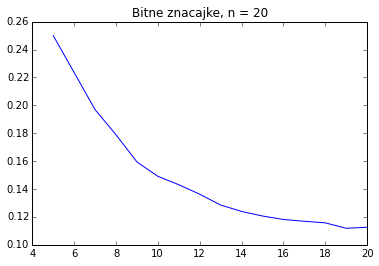

In [18]:
n = 20
infor_test_errs = []
infor_train_errs = []
informatives = range(5, 21)
for informative in informatives:
    best_k, train_errors, test_errors = knn_eval(N, n_features=n, n_classes=K, n_informative=informative, test_size=0.3, k_range=ks)
    infor_test_errs.append(test_errors[best_k-1])
    infor_train_errs.append(train_errors[best_k-1])
    
plt.plot(informatives, infor_test_errs,color='blue', label='Ispitna pogreska k-nn')
plt.title('Bitne znacajke, n = %d' % n)



plt.show()


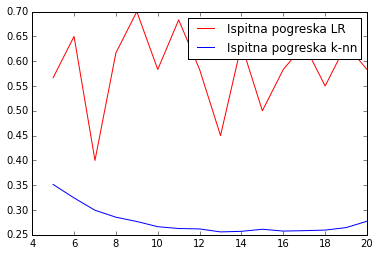

In [105]:
from sklearn import linear_model
knn_error = [];
lr_error = [];
informatives = range ( 5,21)
n = 20
N = 200
K = 5
for informative in informatives:
        best_k, train_errors, test_errors = knn_eval(n_instances = N, n_features=n, n_classes=K, n_informative=informative, test_size=0.3)
        X_lr, y_lr = make_classification(n_samples=N, n_features=n, n_classes=K, n_informative=informative, n_redundant=0)
        X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.3)
        knn_error.append(min(test_errors))
        
        lr = linear_model.LogisticRegression();
        lr.fit(X_lr_train, y_lr_train);
        lr_error.append( error (y_lr_test , lr.predict(X_lr_test)));

plt.plot(znacajke, lr_error,color='red', label='Ispitna pogreska LR')
plt.plot(znacajke, knn_error,color='blue', label='Ispitna pogreska k-nn')

plt.legend();
plt.show();

**Q:** Koji je model manje robusan na prisustvo nebitnih značajki? Što mislite, zašto je tomu tako?

### *4. "Prokletstvo dimenzionalnosti"

<span style="color:green">(Rješavanje ovog zadatka nije obavezno već donosi dodatne bodove.)</span>

["Prokletstvo dimenzionalnosti"](https://en.wikipedia.org/wiki/Curse_of_dimensionality) zbirni je naziv za niz fenomena povezanih s visokodimenzijskim prostorima. Ti fenomeni, koji se uglavnom protive našoj intuiciji, u većini slučajeva dovode do toga da se s porastom broja dimenzija (značajki) smanjenje točnost modela. Na to su osobito osjetljivi klasifikacijski modeli temeljeni na udaljenosti, kao što je algoritam k-nn. Svrha ovog zadatka jest ispitati kako povećanje broja dimenzija utječe na algoritam k-nn.

### (a) 

Općenito, povećanje dimenzija dovodi do toga da sve točke u ulaznome prostoru postaju (u smislu euklidske udaljenosti) sve udaljenije jedne od drugih te se, posljedično, gube razlike u udaljenostima između točaka. Eksperimentalno ćemo provjeriti da je to doista slučaj. 

Proučite funkciju `sklearn.metrics.pairwise.pairwise_distances`. Generirajte 100 slučajnih vektora u $n=5$ dimenzija te izračunajte prosječnu euklidsku udaljenost između svih parova tih vektora. Ponovite to za $n=10$ dimenzija.

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# Vaš kôd ovdje...

Sada ponovite isti eksperiment, ali koristeći kosinus kao mjeru sličnosti (funkciji `pairwise_distances` postavite `metric='cosine'`).

**Q:** Pokušajte objasniti razlike u rezultatima. Koju biste od ovih dviju mjera koristili za klasifikaciju visokodimenzijskih podatakaka?

### (b)

Proučite funkciju [sklearn.neighbors.NearestNeighbors](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors). Pomoću nje, definirajte funkciju `eval_neighbors(X, y, n_neighbors=5, metric='euclidean')` koja za zadani skup za učenje `(X,y)` najprije izračunava susjede za svaki primjer iz `X`, a zatim izračunava (1) prosječan broj susjeda koji su iste klase kao i primjer čiji su oni susjedi te (2) udio primjera u `X` čija je klasa jednaka većinskoj klasi njegovih susjeda.

In [ ]:
# Vaš kôd ovdje...

Sada nas zanima kako povećanje broja dimenzija utječe na susjedstvo primjera, kada se ono izračunava euklidskom udaljenošću. Skicirajte krivulje dviju vrijednosti koje izračunava funkcija `eval_neighbors` (broj susjeda s istom oznakom kao i središnji primjer te broj primjera s oznakom jednakom većinskim oznakama susjeda) kao funkcije broja dimenzija $n$, $n\in\{10,60,\dots,960\}$. Eksperiment provedite na sintetički generiranome skupu od $N=1000$ primjera sa $K=5$ klasa.

In [ ]:
# Vaš kôd ovdje...

**Q:** Je li rezultat očekivan? Obrazložite.
    
**Q:** Uzrokuje li smanjenje broja susjeda koji imaju istu oznaku kao i njihov središnji primjer nužno i smanjenje točnosti klasifikacije? Obrazložite.

Ponovite isti eksperiment i za kosinusnu udaljenost.

In [ ]:
# Vaš kôd ovdje...

### 5. Primjena algoritma k-nn na skupu "101 Questions"

U ovom zadatku algoritam k-nn primijenit ćemo na skup podataka "101 Questions". Skup sadrži odgovore 99 studenata na 101 dihotomno pitanje kojima iskazuju svoju preferenciju prema jednoj od dviju stvari (npr. "more" vs "planina"). Skup podataka preuzmite odavde:

In [19]:
q101 = pd.read_csv("https://github.com/jsnajder/StrojnoUcenje/raw/master/data/questions101-2015.csv", comment='#')

### (a)

Prvi stupac (oznaka "Ime/pseudonim:") jest ime odnosno pseudonim anketiranog studenta/ice, dok su ostali stupci odgovori na pitanja. Taj je stupac potrebno ukloniti iz podataka (zašto?). Nadalje, na dva od 101 pitanja svih 99 anketiranih studenata dalo je identičan odgovor. Pronađite koja su to dva pitanja ([pomoć](http://stackoverflow.com/questions/30503321/finding-count-of-distinct-elements-in-dataframe-in-each-column)) te ih uklonite (uklonite odgovarajuće retke). U načelu ne bi bio problem da te značajke zadržimo, međutim, zbog načina na koji ćemo napraviti predobradu podataka, opisan u nastavku, bitno je ipak da ih uklonimo.

Odgovori na pitanja kategoričke su slučajne varijable. Premda bismo načelno mogli primijeniti algoritam k-nn na kategoričke značajke, implementacija u sklearnu to ne dopušta, pa je kategoričke značajke potrebno pretvoriti u numeričke. Pretvorba kategoričkih u numeričke značajke tipično se provodi tzv. *one-hot* kodiranjem. Upoznajte se s tim kodiranjem i zašto je ono potrebno: [one-hot encoding](http://stackoverflow.com/questions/17469835/one-hot-encoding-for-machine-learning).

Provedite one-hot kodiranje podataka (nakon izbacivanja dvaju suvišnih stupaca). To možete najlakše učiniti izravno nad pandas-okvirom, funkcijom [`get_dummies`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

**Q:** Objasnite zašto kategoričke značajke kodiramo one-hot postupkom, a ne nekim drugim (npr. zašto ih jednostavno ne indeksiramo po vrijednostima)?

**Q:** Koja je dimenzija podataka q101 nakon *one-hot* kodiranja? Zašto?

In [20]:
q101_f = q101.drop(q101.axes[1][0], 1)

distincts = q101_f.apply(lambda x: len(x.unique())).tolist()
unique1 = distincts.index(1)
unique2 = distincts.index(1, unique1+1)
q101_f = q101_f.drop(q101_f.axes[1][unique1], 1)
q101_f = q101_f.drop(q101_f.axes[1][unique2-1], 1)

print 'q101.shape:', q101.shape
print 'q101_f.shape:', q101_f.shape

q101_dm = pd.get_dummies(q101_f)
print 'q101_dm.shape:', q101_dm.shape


q101.shape: (99, 102)
q101_f.shape: (99, 99)
q101_dm.shape: (99, 198)


### (b)

Proučite funkciju [sklearn.neighbors.NearestNeighbors](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors). Pomoću te funkcije, ispišite za svakog od 99 anketiranih studenata/ica njihovih pet najbližih susjeda po euklidskoj mjeri udaljenosti. Ispišite imena odnosno pseudonim svakog studenta/ice te također imena odnosno pseudonim njihovih pet najbližih susjeda.

In [21]:
from sklearn.neighbors import NearestNeighbors

def name_for_index(index):
    return str(q101[q101.axes[1][0]][index])

neighb = NearestNeighbors(metric = 'euclidean')
neighb.fit(q101_dm)
kneighbors = neighb.kneighbors()[1]
print 'Ime: najbliži (euklidska udaljenost) susjedi'
print '------------------------'
for i in range(len(kneighbors)):
    print '%d. %s: %s' % (i+1, name_for_index(i), ', '.join(map(lambda x: name_for_index(x), kneighbors[i])))
   

Ime: najbliži (euklidska udaljenost) susjedi
------------------------
1. Zdravko Mamic: kale, ja, Chiraox, Marluk, Krumpirko
2. Josip: Ante, maslačak, Gljiva, musketir, Kec
3. Ivan Dundović: Filip, Kec, polo, Antiša, Marluk
4. Vinkovic Tomo: Ojo, Mateo, Zdravko Mamic, Dario, Password123
5. Muškarac24: Mimi, Jakov Ivančan, luka, Filip, Kec
6. Ante: Filip, polo, Tin, Bojanovski, Petar!!!!!!
7. Mateo: Ojo, Chiraox, Ante, Vinkovic Tomo, Filip
8. nordlys: Luka, Antiša, Krumpirko, Goga, Miško
9. Password123: Zlatan, Gljiva, Kec, Jantol, Tin
10. Taylor Bagley: Vicky, Jan Tomljanović, Filip, vrana, betelgeuse
11. Miško: Pevec, nordlys, staljinove-orgulje, Jelena Kopcic, Antiša
12. Ante: Josip, musketir, limp bizkit, Filip, Kec
13. dextroza: musketir, Gljiva, Filip, zmajo, Spidey
14. Backo: 765100, Josip, limp bizkit, Ante, maslačak
15. Chiraox: Spidey, Zdravko Mamic, Mateo, Marluk, Kemi
16. Yuki: musketir, Pevec, Jure, Flige, Chiraox
17. ja: Zdravko Mamic, Petar!!!!!!, malimate, Krumpirko, Mim

### (c)

Za kategoričke se značajke nerijetko kao mjera udaljenosti koristi [Hammingova udaljenost](https://en.wikipedia.org/wiki/Hamming_distance). Ponovite izračun susjeda za sve primjere iz skupa q101 pomoću Hammingove udaljenosti te usporedite rezultate s onima koje ste dobili s euklidskom udaljenošću.

In [22]:
neighb = NearestNeighbors(metric = 'hamming')
neighb.fit(q101_dm)
kneighbors = neighb.kneighbors()[1]
print 'Ime: najbliži (Hammingova udaljenost) susjedi'
print '------------------------'
for i in range(len(kneighbors)):
    print '%d. %s: %s' % (i+1, name_for_index(i), ', '.join(map(lambda x: name_for_index(x), kneighbors[i])), )

Ime: najbliži (Hammingova udaljenost) susjedi
------------------------
1. Zdravko Mamic: kale, ja, Chiraox, Marluk, Krumpirko
2. Josip: Ante, maslačak, Gljiva, musketir, Kec
3. Ivan Dundović: Filip, Kec, polo, Antiša, Marluk
4. Vinkovic Tomo: Ojo, Mateo, Zdravko Mamic, Dario, Password123
5. Muškarac24: Mimi, Jakov Ivančan, luka, Filip, Kec
6. Ante: Filip, polo, Tin, Bojanovski, Petar!!!!!!
7. Mateo: Ojo, Chiraox, Ante, Vinkovic Tomo, Filip
8. nordlys: Luka, Antiša, Krumpirko, Goga, Miško
9. Password123: Zlatan, Gljiva, Kec, Jantol, Tin
10. Taylor Bagley: Vicky, Jan Tomljanović, Filip, vrana, betelgeuse
11. Miško: Pevec, nordlys, staljinove-orgulje, Jelena Kopcic, Antiša
12. Ante: Josip, musketir, limp bizkit, Filip, Kec
13. dextroza: musketir, Gljiva, Filip, zmajo, Spidey
14. Backo: 765100, Josip, limp bizkit, Ante, maslačak
15. Chiraox: Spidey, Zdravko Mamic, Mateo, Marluk, Kemi
16. Yuki: musketir, Pevec, Jure, Flige, Chiraox
17. ja: Zdravko Mamic, Petar!!!!!!, malimate, Krumpirko, Mi

**Q:** Razlikuju li se rezultati? Razlikuje li se euklidska udaljenost od Hammingove za pojedinačne parove primjera iz skupa q101 (provjerite)? Obrazložite.

### (d)

Želimo predvidjeti odgovore na neka pitanja na temelju poznatih odgovora na neka druga pitanja. Predikciju ćemo ostvariti algoritmom k-nn, što zapravo znači da će se predviđanje odvijati tako da će se za poznate odgovore na pitanja najprije pronaći studenti koji su na sličan način odgovorili na ta pitanja (susjedi), a onda će se predikcija izračunati kao njihov većinski odgovor. Odgovore na prvih 49 pitanja koristit ćemo kao poznate odgovore, te pomoću njih pokušati predvidjeti odgovore na ostala 49 pitanja.

Skup q101, binariziran na način kako je opisano u dijelu (a), podijelite po stupcima u dva dijela: prvi dio (50 odgovora) koristit ćemo kao značajke (poznati odgovori), a drugi dio (49 odgovora) čine odgovori koje ćemo pokušati predvidjeti (nepoznati odgovori). Oba ova skupa podijelite na skupove za učenje i ispitivanje u omjeru 7:3.

Za svaki od 49 nepoznatih odgovora, trenirajte po jedan k-nn klasifikator na 50 poznatih odogovora. Klasifikatore naravno trenirajte na skupu za učenje i ispitajte na skupu za ispitivanje. Paralelno s time, za svaki od 49 nepoznatih odgovora trenirajte i po jedan referentni klasifikator, koji će sve primjere jednostavno klasificirati u najčešću klasu za dotično pitanje. U tu svrhu iskoristite model [`sklearn.dummy.DummyClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). Sada za svaki od 49 nepoznatih odgovora ispišite točnost klasifikatora k-nn, točnost referentnog klasifikatora te razliku između njih. Dodatno, za svako pitanje ispišite i dva ponuđena odgovora, kako bismo mogli vidjeti za koja to pitanja klasifikator radi dobro.

In [23]:
X_binary = q101_dm.values


In [91]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

k = 5

X_first = X_binary[0:50, : ]
X_second = X_binary[50:, : ]

first_split_index = int(X_first.shape[1]*0.7)
X_first_train = X_first[:,0:first_split_index]
X_first_test = X_first[:,first_split_index:]

print X_first_train.shape
print X_first_test.shape

second_split_index = int(X_second.shape[1]*0.7)
X_second_train = X_second[:,0:second_split_index]
X_second_test = X_second[:,second_split_index:]

print X_second_train.shape
print X_second_test.shape

best_k = 0
best_error = 1.0
ks = range(1, 51)
for k in ks:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_first_train, X_first_test)

    
    
    differences = (neigh.predict(X_second_train) - X_second_test).ravel()
    correct = len([x for x in differences if int(x) == 0])
    error_knn = 1 - correct / float(len(differences))
    if error_knn < best_error:
        best_error = error_knn
        best_k = k
  
k = 5
print 'k:', k
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_first_train, X_first_test)
differences = (neigh.predict(X_first_train) - X_first_test).ravel()
correct = len([x for x in differences if int(x) == 0])
print 'Pogreška učenja:', 1 - correct / float(len(differences))

differences = (neigh.predict(X_second_train) - X_second_test).ravel()
correct = len([x for x in differences if int(x) == 0])
print 'Ispitna pogreška:', 1 - correct / float(len(differences))
        
    
print '\n'
print 'Optimalni k:', best_k

k = best_k
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_first_train, X_first_test)
differences = (neigh.predict(X_first_train) - X_first_test).ravel()
correct = len([x for x in differences if int(x) == 0])
print 'Pogreška učenja, k-nn:', 1 - correct / float(len(differences))

differences = (neigh.predict(X_second_train) - X_second_test).ravel()
correct = len([x for x in differences if int(x) == 0])
print 'Ispitna pogreška, k-nn:', 1 - correct / float(len(differences))

print '\n'
dummy = DummyClassifier()
dummy.fit(X_first_train, X_first_test)


differences = (dummy.predict(X_first_train) - X_first_test).ravel()
correct = len([x for x in differences if int(x) == 0])
print 'Pogreška učenja, dummy:', 1 - correct / float(len(differences))

dummy_predict = dummy.predict(X_first_train)
differences = (dummy.predict(X_second_train) - X_second_test).ravel()
correct = len([x for x in differences if int(x) == 0])
print 'Ispitna pogreška, dummy:', 1 - correct / float(len(differences))

index = second_split_index / 2
#print '\nDobro pogođena pitanja (od %d. na dalje) s dummyjem:' % index



(50L, 138L)
(50L, 60L)
(49L, 138L)
(49L, 60L)
k: 5
Pogreška učenja: 0.224
Ispitna pogreška: 0.312925170068


Optimalni k: 23
Pogreška učenja, k-nn: 0.28
Ispitna pogreška, k-nn: 0.290476190476


Pogreška učenja, dummy: 0.378666666667
Ispitna pogreška, dummy: 0.388095238095


**Q:** Za koja pitanja klasifikator radi bolje od referentnog modela?
    
**Q:** Zašto za dotična pitanja klasifikator radi dobro, a za druga ne?

**Q:** Kada biste željeli optimirati hiperparametar $k$, kako biste to napravili?

### 6. Stabla odluke

U ovom zadatku usredotočit ćemo se na primjenu stabala odluke za problem klasifikacije. Upoznajte se s klasom [`DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). Ako nije rečeno drugačije, koristite pretpostavljene parametre modela. 

Radit ćemo sa skupom podataka *Titanic*. S obzirom na to da taj skup podataka za neke primjere nema vrijednosti svih atributa, a i da su neki atributi nebrojčani, prvo ga trebamo obraditi.

### (a)

Prvo učitajte skup podataka _Titanic_ i izdvojite samo sljedeće atribute: _Pclass, Sex, Age, SibSp, Parch,_ i _Embarked_. To su značajke s kojima ćemo raditi. Ciljnu klasu predstavlja atribut _Survived_.

In [116]:
df = pd.read_csv('https://raw.githubusercontent.com/jsnajder/StrojnoUcenje/master/data/titanic-train.csv')

titanic_X = df[['Pclass', 'Sex', 'Age' , 'SibSp' , 'Parch' , 'Embarked']].as_matrix()
titanic_y = df['Survived'].as_matrix()

**Q:** Pogledajte ostale značajke u skupu podataka. Smatrate li da bi bilo dobro uključiti još koju? Zašto?

### (b)

Koristeći razred [`LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) pretvorite nebrojčane atribute _Sex_ i _Embarked_ u numeričke (ovakav pristup moguć je kod stabala odluke, ali inače se koristi [`OneHotEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)).

In [117]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

titanic_X[:,1] = le.fit_transform(titanic_X[:,1])
titanic_X[:,5] = le.fit_transform(titanic_X[:,5])

**Q:** Mogli smo koristiti i spomenuti _hot-one encoding_. Zašto to kod stabala odluke često ipak nije najbolja ideja?

### (c) 

U skupu podataka _Titanic_ za neke primjeri nisu poznate vrijednosti svih atributa. Proučite razred [`Imputer`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) i pomoću njega riješite ovaj problem tako da nedostajuće vrijednosti zamijenite najčešćom vrijednošću dotičnog atributa kroz primjere.

In [118]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
titanic_X = imp.fit_transform(titanic_X)

### (d)

Na tako pripremljenome skupu _Titanic_ trenirajte stablo odluke (klasa `DecisionTreeClassifier`). Izgradite dva stabla koristeći dva različita kriterija oabira korijenskog čvora (parametar `criterion`): `entropy` (informacijska dobit) i `gini` (Ginijev indeks). Ispitajte modele na cijelom skupu (istom na kojem ste ih i trenirali) te ispišite točnost modela. Nadalje, član `feature_importances_` sadrži polje kriterijskih vrijednosti za svaki atribut. Ispišite te vrijednosti za oba modela.

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

dtc_en = DecisionTreeClassifier(criterion='entropy')
dtc_en.fit(titanic_X, titanic_y)
titanic_y_predicted_en = dtc_en.predict(titanic_X)

print("Točnost entropy: " +str(accuracy_score(titanic_y, titanic_y_predicted_en)))
print ("feature_importances_" + str(dtc_en.feature_importances_))


dtc_gini = DecisionTreeClassifier(criterion='gini')
dtc_gini.fit(titanic_X, titanic_y)
titanic_y_predicted_gini = dtc_gini.predict(titanic_X)
print("Točnost gini: " +str(accuracy_score(titanic_y, titanic_y_predicted_gini)))
print ("feature_importances_" + str(dtc_gini.feature_importances_))



Točnost entropy: 0.937149270483
feature_importances_[ 0.14391159  0.28326324  0.37516131  0.10121873  0.05041039  0.04603474]
Točnost gini: 0.937149270483
feature_importances_[ 0.13026401  0.36049851  0.32214486  0.08625013  0.05845147  0.04239101]


**Q:** Usporedite rezultate modela s kriterijem `entropy` i `gini`. Postoji li razlika? Zašto?

**Q:** Zašto pogreška učenja nije jednaka nuli? Bi li to trebala biti?

**Q:** Koja značajka je korijenska značajka prema kriteriju `entropy`, a koja prema kriteriju `gini`?

### 7. Regularizacija stabala odluke

Pri izgradnji stabla odluke vrlo lako može doći do prenaučenosti s obzirom na to da stablo raste dok se svi primjeri za učenje ispravno ne klasificiraju. Jedan od načina sprječavanja prenaučenosti jest zaustavljanje rasta stabla na određenoj dubini. Spomenuto ograničenje regulira se pomoću parametra `max_depth` konstruktora razreda `DecisionTreeClassifier`.

Podijelite skup podataka _Titanic_ na skup za učenje i na skup za ispitivanje u omjeru 2:3 korištenjem funkcije [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html).

Iscrtajte krivulje pogrešaka na skupu za učenje i na skupu za ispitivanje za svaki parametar maksimalne dubine $d$, pri čemu je $d \in \{1,2,\ldots,30\}$. Koristite Ginijev indeks.

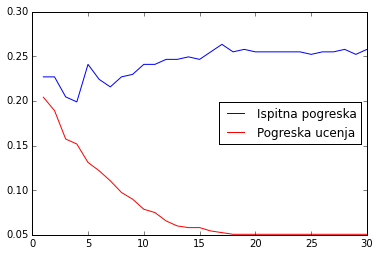

In [176]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(titanic_X, titanic_y, test_size=0.4, random_state=42)

error_train = []
error_test = []

ds = range(1,31)
for d in ds:
    dtc = DecisionTreeClassifier(criterion='gini' ,max_depth=d )
    dtc.fit(X_train, Y_train)
    error_train.append(1 - accuracy_score(Y_train, dtc.predict(X_train)))
    error_test.append(1 - accuracy_score(Y_test, dtc.predict(X_test)))
    

plt.plot(ds, error_test, color='blue', label='Ispitna pogreska')
plt.plot(ds, error_train, color='red', label='Pogreska ucenja')
plt.legend(loc = 'center right')
plt.show()

**Q:** Na koju biste dubinu ograničili rast stabla i zašto?
    
**Q:** Kojoj strani u grafikonu odgovara područje prenaučenosti, a kojoj područje podnaučenosti?

### 8. Matrice zabune i evaluacijske mjere

Kako bismo se uvjerili koliko naš naučeni model zapravo dobro radi, nužno je provesti evaluaciju modela. Ovaj korak od presudne je važnosti u svim primjenama strojnog učenja, pa je stoga bitno znati provesti evaluaciju na ispravan način. Cilj ovog zadatka jest upoznati se s osnovnim evaluacijskim mjerama temeljenima na matrici zabune (engl. *confusion matrix*).

Preuzmite Glass Identification Data Set, koji opisuje rezultate kemijske analize 214 stakala. Riječ je o klasifikacijskom problemu sa šest klasa: na temelju 9 kemijskih značajki stakla potrebno je, u svrhu forenzičke analize, odrediti o kojoj se od šest vrsta stakla radi. Skup podataka možete učitati na sljedeći način:

In [191]:
data = sp.loadtxt("glass.csv", delimiter=',')
glass_X, glass_y = data[:,1:10], data[:,10]

Ovaj skup podataka ne sadrži nenumeričke atribute niti nedostajuće vrijednosti, stoga ne treba raditi nikakvu obradu. Podijelite skup primjera na skup za učenje i na skup za ispitivanju u omjeru 2:3 (koristite funkciju `train_test_split`). Izgradite stablo odluke na temelju dobivenog skupa za učenje.

In [192]:
X_train, X_test, y_train, y_test = train_test_split(glass_X, glass_y, test_size=float(1)/3, random_state=42)
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test)

### (a)

Definirajte funkciju `create_confusion_matrix(y_true, y_pred)` koja generira matricu zabune dimenzija $K\times K$, gdje je $K$ broj klasa. Funkcija prima stvarne oznake primjera (`y_true`) i oznake predikcije modela (`y_pred`) te vraća (1) matricu zabune i (2) polje oznaka klasa (gdje su klase poredane onako kako su poredane u matrici zabune). Retci matrice neka odgovaraju stvarnim oznakama (true), a stupci predikcijama modela (pred).

In [193]:
from sklearn.metrics import confusion_matrix

def create_confusion_matrix(y_true, y_pred):
    confusion_matrix = np.zeros((7,7))
    classes = [1,2,3,5,6,7]
    for (t, p) in zip(y_true, y_pred):
        confusion_matrix[t-1][p-1] += 1
    confusion_matrix = sp.delete(confusion_matrix, 3, 0) 
    confusion_matrix = sp.delete(confusion_matrix, 3, 1)  
    return confusion_matrix,classes



Izračunajte i ispišite matricu zabune za stablo odluke na ispitnome dijelu skupa `glass`. Uvjerite se da vaša implementacija radi jednako kao funkcija [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [182]:
print create_confusion_matrix(y_test, predict)
print confusion_matrix(y_test, predict)

(array([[ 17.,   4.,   2.,   0.,   0.,   0.],
       [  5.,  14.,   1.,   3.,   1.,   1.],
       [  2.,   0.,   2.,   0.,   0.,   0.],
       [  0.,   4.,   0.,   2.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   4.,   0.],
       [  1.,   0.,   0.,   0.,   0.,   9.]]), [1, 2, 3, 5, 6, 7])
[[17  4  2  0  0  0]
 [ 5 14  1  3  1  1]
 [ 2  0  2  0  0  0]
 [ 0  4  0  2  0  0]
 [ 0  0  0  0  4  0]
 [ 1  0  0  0  0  9]]


**Q:** Koja je klasa najbrojnija?
    
**Q:** Koja klasa ima najviše pogrešnih pozitivnih klasifikacija (false positives), a koja najviše pogrešnih negativnih klasifikacija (false negatives)?

### (b)

Definirajte funkciju `twoway_confusion_matrix(cm, i)` koja prima matricu zabune `cm` dimenzija $K\times K$ i indeks klase $i$ te izračunava binarnu matricu zabune za klasu $i$ kao pozitivnu klasu.

In [189]:
def twoway_confusion_matrix(cm, i):
    matrices = [];
    for c in range( 0,6):
        tp = 0
        fp = 0
        fn = 0
        tn = 0
        tp = cm[c][c];
        fn = sum(cm[c:c+1]) - tp
        fp = sum(cm[:,c]) - tp
        tn = sum(cm)-tp-fp-fn
        matrices.append(sp.array([[tp, fp], [fn, tn]]))
    return matrices

Izračunajte i ispišite binarne matrice zabune za svih 6 klasa iz skupa `glass`.

In [190]:
cm , i = create_confusion_matrix(y_test, predict)
matrices = twoway_confusion_matrix ( cm , i)
for class_ind in range(len(matrices)):
    print 'K = %d' % (class_ind+1)
    print matrices[class_ind]

K = 1
[[ 17.   8.]
 [  6.  41.]]
K = 2
[[ 14.   8.]
 [ 11.  39.]]
K = 3
[[  2.   3.]
 [  2.  65.]]
K = 4
[[  2.   3.]
 [  4.  63.]]
K = 5
[[  4.   1.]
 [  0.  67.]]
K = 6
[[  9.   1.]
 [  1.  61.]]


### (c)

Pomoću funkcija iz (a) i (b) dijela zadatka, definirajte funkcije `accuracy`, `precision`, `recall` i `f1` za izračun točnosti, preciznosti, odziva odnosno F1-mjere. Svaka od ovih funkcija uzima kao argumente stvarne oznake primjera `y_true` i predviđene oznake `y_pred`. Funkcije trebaju izračunavati mikro i makro varijante ovih mjera, što se određuje opcijom `averaging=micro` odnosno `averaging=macro` (podrazumijevana vrijednost).

Izračunajte vrijednosti ovih evaluacijskih mjera na skupu `glass`. Uvjerite da vaša implementacija daje identične rezultate kao funkcije iz paketa [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Ove funkcije pretpostavljaju makro-mjere, osim one za F1 koja može primiti i parametar koji definira hoće li se izračunati mikro ili makro vrijednost.

In [200]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def sumByElement(matrices):
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for class_ind in range(len(matrices)):
        tp += matrices[class_ind][0][0]
        fp += matrices[class_ind][0][1]
        fn += matrices[class_ind][1][0]
        tn += matrices[class_ind][1][1]
    
    return sp.array([[tp, fp], [fn, tn]])



def accuracy ( y_true , y_pred , averaging='macro' ):
    accArry = [];
    cm , i = create_confusion_matrix(y_true, y_pred)
    matrices = twoway_confusion_matrix ( cm , i)
    if ( averaging=='macro'):    
        for class_ind in range(len(matrices)):
            acc = (matrices[class_ind][0][0] + matrices[class_ind][1][1])  / (sum(matrices[class_ind]))  
            accArry.append(acc)
        return np.mean(accArry)  
    else:
        accAll = sumByElement(matrices)
        return (accAll[0][0]+accAll[1][1] ) /  sum(accAll)
    
    
def precision ( y_true , y_pred , averaging='macro' ):
    accArry = [];
    cm , i = create_confusion_matrix(y_true, y_pred)
    matrices = twoway_confusion_matrix ( cm , i)
    if ( averaging=='macro'):     
        for class_ind in range(len(matrices)):
            acc = (matrices[class_ind][0][0])  / (matrices[class_ind][0][0]+ matrices[class_ind][0][1])
            accArry.append(acc)
        return np.mean(accArry)    
    else:
        accAll = sumByElement(matrices)
        return (accAll[0][0]) /  (accAll[0][0]+accAll[0][1] )
    
    
def recall ( y_true , y_pred , averaging='macro'):
    accArry = [];
    cm , i = create_confusion_matrix(y_true, y_pred)
    matrices = twoway_confusion_matrix ( cm , i)
    if ( averaging=='macro'):
        for class_ind in range(len(matrices)):
            acc = (matrices[class_ind][0][0] )  / (matrices[class_ind][0][0] + matrices[class_ind][1][0])
            accArry.append(acc)
        return np.mean(accArry)   
    else:
        accAll = sumByElement(matrices)
        return (accAll[0][0]) /  (accAll[0][0]+accAll[1][0] )
    
    
def f1 ( y_true , y_pred , averaging='macro'):
    if ( averaging=='macro'):
        return (2*precision(y_true,y_pred,averaging='macro') * recall ( y_true , y_pred , averaging='macro')) / (precision(y_true,y_pred,averaging='macro') + recall ( y_true , y_pred , averaging='macro'))
    else:
        return (2*precision(y_true,y_pred,averaging='micro') * recall ( y_true , y_pred , averaging='micro')) / (precision(y_true,y_pred,averaging='micro') + recall ( y_true , y_pred , averaging='micro'))


    
print 'Macro funkcije:'
print("precision_score_builtin:" + str( precision_score(y_test, predict,average='macro')))
print("precision:" + str( precision(y_test, predict)))
print("recall_score_builtin:" + str( recall_score(y_test, predict,average='macro')))
print("recall:" + str( recall(y_test, predict)))
print("f1_score_builtin:" + str( f1_score(y_test, predict , average='macro')))
print("f1:" + str( f1(y_test, predict)))

print '\nMicro funkcije:'
print("precision_score_builtin:" + str( precision_score(y_test, predict,average='micro')))
print("precision:" + str( precision(y_test, predict, averaging='micro')))
print("recall_score_builtin:" + str( recall_score(y_test, predict,average='micro')))
print("recall:" + str( recall(y_test, predict, averaging='micro')))
print("f1_score_builtin:" + str( f1_score(y_test, predict , average='micro')))
print("f1:" + str( f1(y_test, predict, averaging='micro')))





Macro funkcije:
precision_score_builtin:0.618101343101
precision:0.618101343101
recall_score_builtin:0.623743961353
recall:0.623743961353
f1_score_builtin:0.618100019252
f1:0.620909832941

Micro funkcije:
precision_score_builtin:0.638888888889
precision:0.638888888889
recall_score_builtin:0.638888888889
recall:0.638888888889
f1_score_builtin:0.638888888889
f1:0.638888888889


**Q:** Usporedite mikro-F1 i makro-F1. Koja je vrijednost veća? Je li to očekivano i zašto?

**Q:** Koji je odnos između mjera preciznosti, odziva i F1-mjere? Može li F1-mjera biti veća od preciznosti ili odziva? Obrazložite.

**Q:** Zašto su vrijednosti mikro-preciznosti, mikro-odziva i mikro-F1 identične? Hoće li to uvijek biti slučaj?